In [ ]:
input('Warning: contains solution spoilers. Press enter to continue.')
import numpy as np
import matplotlib.pyplot as plt

# Problem set 5

## Question 1

part a

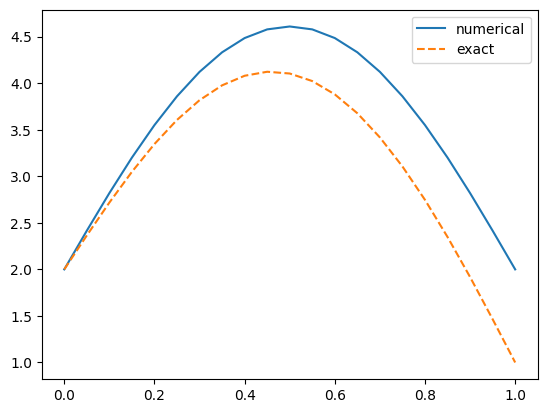

In [ ]:
dx = 1/20
Lx = 1
x = np.arange(0, Lx+dx, dx)

f = -100 * x * (1-x)

# matrix for centred approx
n = len(x)
M = -2 * np.identity(n) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
M *= 1/dx**2

# BCs
f[0] = 2
f[-1] = 1
M[0, 0], M[0, 1] = 1, 0
M[-1, -1], M[-1, -2] = 1, 0

## part b
# f[15] += 30
## part c
# f[20] += 1

phi = np.linalg.solve(M, f)
exact = 1/3 * (25*x**4 - 50*x**3 + 22*x + 6)

plt.plot(x, phi, label='numerical')
plt.plot(x, exact, '--', label='exact')
plt.legend()
plt.show()

part b

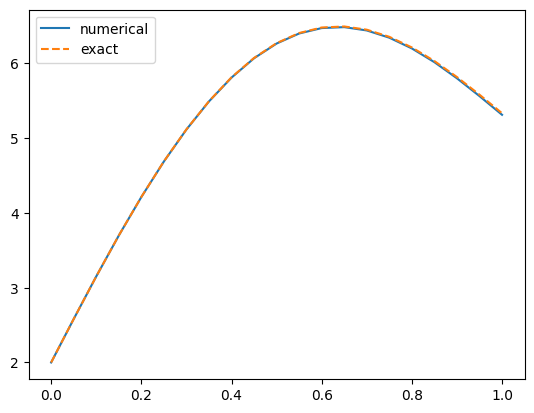

In [56]:
# matrix for centred approx
n = len(x)
M = -2 * np.identity(n) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
M *= 1/dx**2

# BCs
f[0] = 2
f[-1] = -5
M[0, 0], M[0, 1] = 1, 0
M[-1, -1], M[-1, -2] = 1/dx, -1/dx


phi = np.linalg.solve(M, f)
exact = 1/3 * (25*x**4 - 50*x**3 + 35*x + 6)

plt.plot(x, phi, label='numerical')
plt.plot(x, exact, '--', label='exact')
plt.legend()
plt.show()

part e: you should get a singular error

## Question 2

part a

In [99]:
def diffusion_BE(phi_fn, k=1, dx=1, L=100, dt=0.01, T=50, snapshots=[], f=None):
    ''' Diffusion equation dphi/dt = k d^2phi/dx^2 + f(x,t) 
    BC: phi(0) = phi(L) = 0
    Forcing f
    
    Given initial condition phi_fn(np.array -> np.array), solve the
    diffusion equation using backwards Euler with coef k on domain [0,L]
    with grid space dx. Simulate to time T with timestep dt. Save
    extra snapshots as a list of indices.'''
    if f is None:
        f = lambda x, t: 0
    if isinstance(snapshots, int):
        Nt = int(T/dt)
        snapshots = np.arange(0, Nt, Nt//snapshots)
    # Time and space axis
    t_list = np.arange(0, T, dt, dtype=np.float64)
    x = np.arange(0, L+dx, dx, dtype=np.float64)
    
    # IC
    phi = np.array(phi_fn(x), dtype=np.float64)
    
    phi_list = []
    ts = []
    
    n = len(x)
    dtdx = -k*dt/dx**2
    
    # Matrix for BE
    M = (1-2*dtdx)*np.identity(n) + \
        dtdx*np.diag(np.ones(n-1), 1) + \
        dtdx*np.diag(np.ones(n-1), -1)
    
    # Enforce BC
    M[0,0], M[0,1] = 1, 0
    M[-1,-1], M[-1,-2] = 1, 0
    phi[0] = 0
    phi[-1] = 0

    for i, t in enumerate(t_list):
        if i in snapshots:
            phi_list.append(phi)
            ts.append(t)
        phi = np.linalg.solve(M, phi)  # BE step
        phi += dt*f(x, t) # Add forcing

    if t not in ts:  # Save last snapshot
        phi_list.append(phi)
        ts.append(t)
    return x, ts, phi_list

def plot_phis(x, ts, phi_list, ax=None):
    if ax is None:
        ax=plt
    colors = plt.cm.magma(np.linspace(0, 1, len(phi_list)))
    for i, phi in enumerate(phi_list):
        ax.plot(x, phi, label=f"{ts[i]:.2f}", color=colors[i])
    ax.legend(loc='upper right')


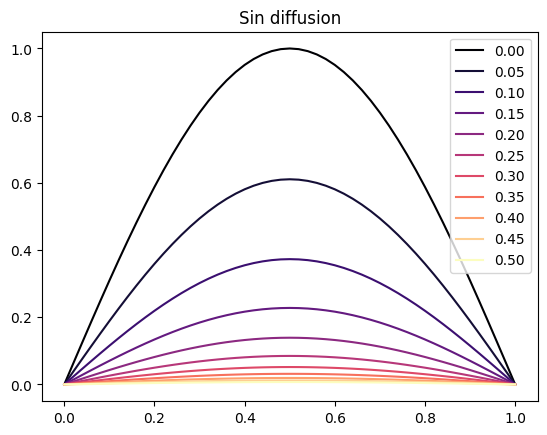

In [100]:
ic = lambda x: np.sin(np.pi*x)
out = diffusion_BE(ic, k=1, dx=1/50, L=1, dt=1e-4, T=.5, snapshots=10)
plt.title("Sin diffusion")
plot_phis(*out)

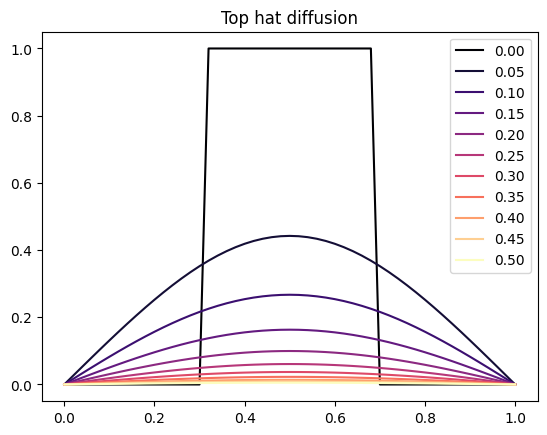

In [101]:
ic = lambda x: (x>.3)*(x<.7)
out = diffusion_BE(ic, k=1, dx=1/50, L=1, dt=1e-4, T=.5, snapshots=10)
plt.title("Top hat diffusion")
plot_phis(*out)

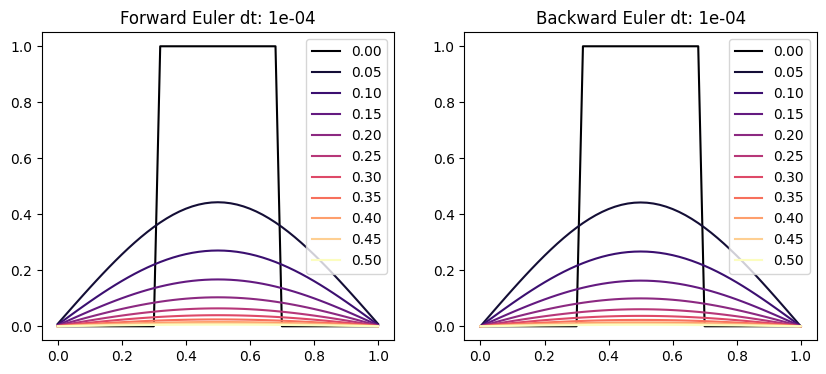

Unstable, check dt


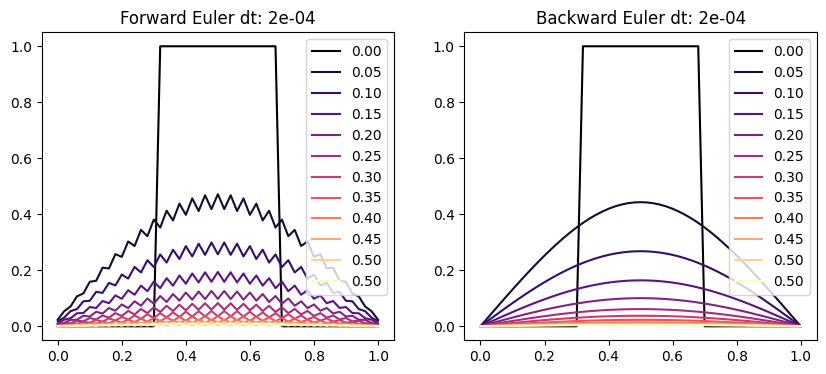

Unstable, check dt


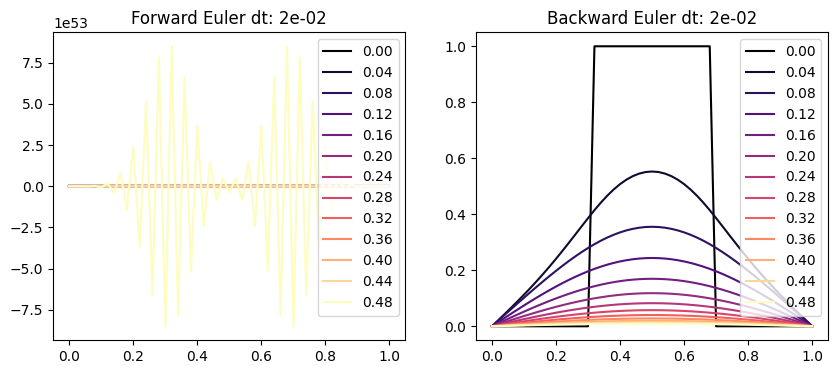

In [137]:
# !pip install import-ipynb
import import_ipynb
from ps3 import diffusion_FE  # Get code from previous notebook to compare
ic = lambda x: (x>.3)*(x<.7)
dt = 1e-4

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[0].set_title(f"Forward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[0])
out = diffusion_BE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[1].set_title(f"Backward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[1])
plt.show()

dt = 2.001e-4

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[0].set_title(f"Forward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[0])
out = diffusion_BE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[1].set_title(f"Backward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[1])
plt.show()


dt = 2e-2

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
out = diffusion_FE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[0].set_title(f"Forward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[0])
out = diffusion_BE(ic, k=1, dx=1/50, L=1, dt=dt, T=.5, snapshots=10)
axs[1].set_title(f"Backward Euler dt: {dt:.0e}")
plot_phis(*out, ax=axs[1])
plt.show()

## Problem 3
part abc

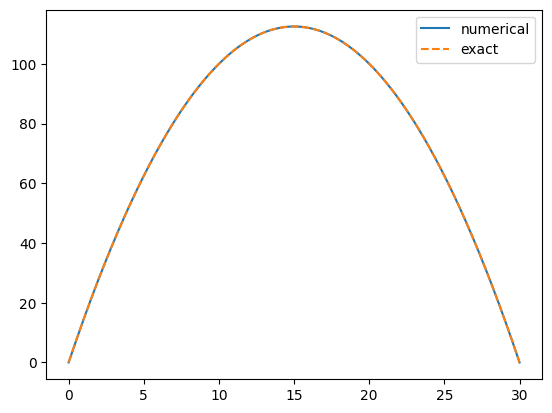

In [159]:
H = 30
Q = 500
k = 500

dx = 1/20
Lx = H
x = np.arange(0, Lx+dx, dx)

f = np.ones(len(x))*-Q/k

# matrix for centred approx
n = len(x)
M = -2 * np.identity(n) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
M *= 1/dx**2

# BCs
f[0] = 0
f[-1] = 0
M[0, 0], M[0, 1] = 1, 0
M[-1, -1], M[-1, -2] = 1, 0


phi = np.linalg.solve(M, f)
exact = x * (H-x) * Q/2/k

plt.plot(x, phi, label='numerical')
plt.plot(x, exact, '--', label='exact')
plt.legend()
plt.show()

part d

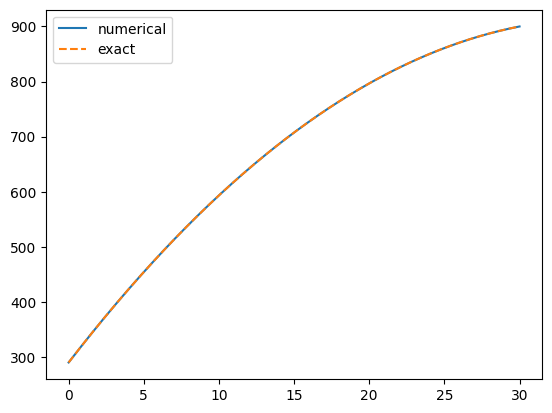

Heat flux at 0: 0.017604166666694482 W/m^2


In [160]:
# matrix for centred approx
n = len(x)
M = -2 * np.identity(n) + np.diag(np.ones(n-1), 1) + np.diag(np.ones(n-1), -1)
M *= 1/dx**2

# BCs
f[0] = 290
f[-1] = 900
M[0, 0], M[0, 1] = 1, 0
M[-1, -1], M[-1, -2] = 1, 0


phi = np.linalg.solve(M, f)
exact = -x**2/2 + (106*x)/3 + 290

plt.plot(x, phi, label='numerical')
plt.plot(x, exact, '--', label='exact')
plt.legend()
plt.show()

print('Heat flux at 0:', (phi[5]-phi[0])/5/dx*k/1e6, 'W/m^2')